<a href="https://colab.research.google.com/github/coryroyce/code_assignments/blob/main/211113_Information_Retieval_System_Cory_Randolph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information Retrieval (IR) Similarity

CMPE 256

Cory Randolph

11/13/2021



# Prompt

Learning Objective: application of Information Retrieval (IR) Similarity on the following documents.

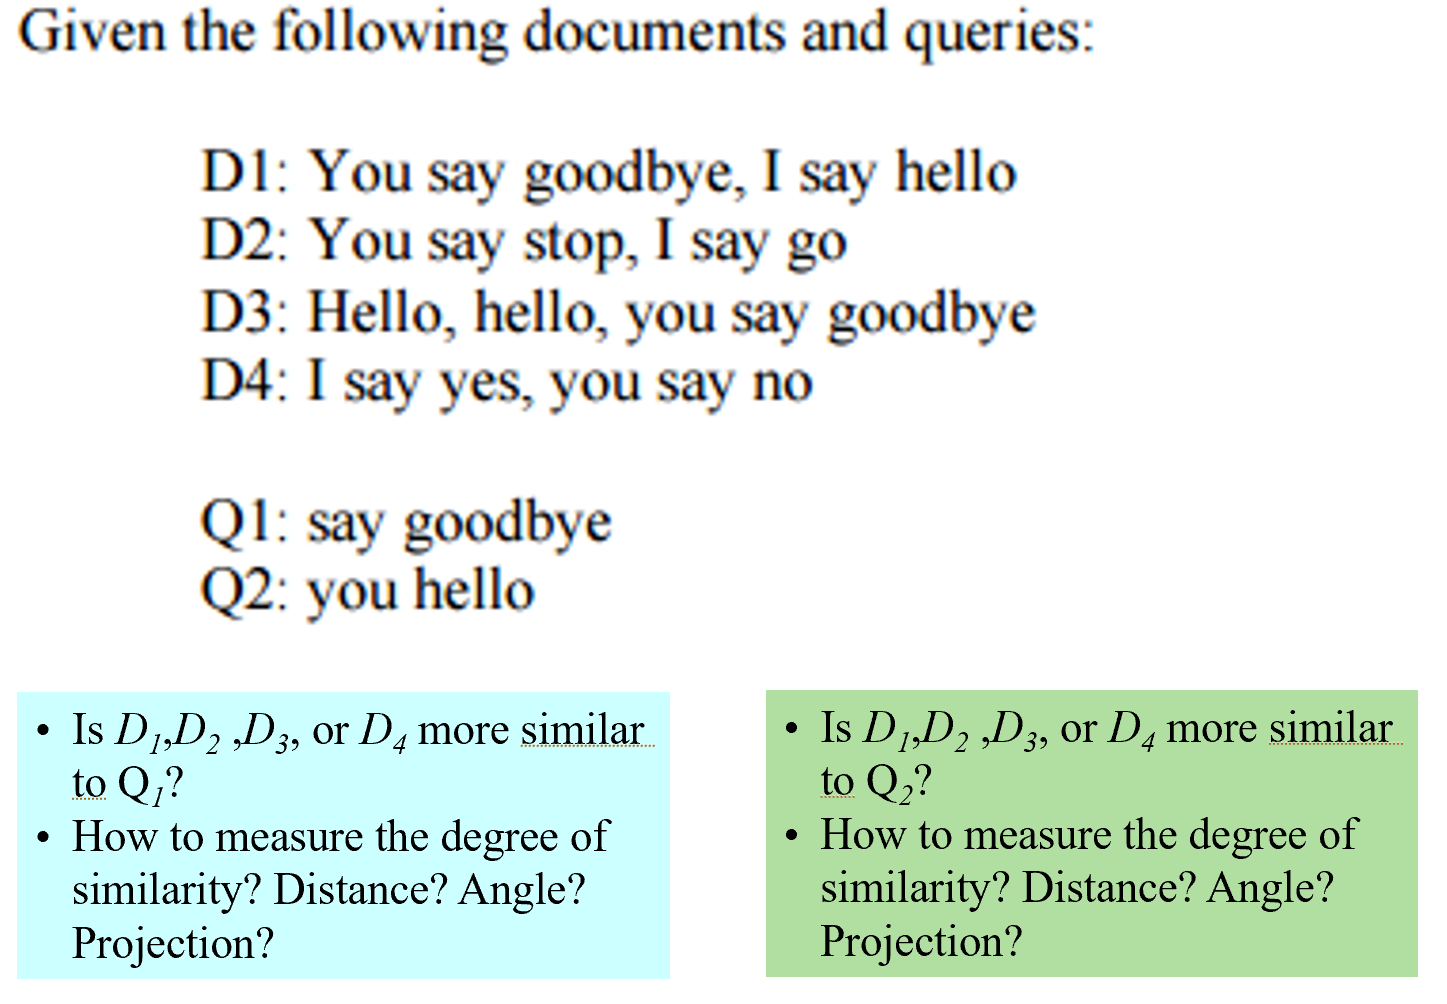

# Summary of Analysis

After applying TF-IDF and Cosine similarity measures between the documents and query 1, the below table shows the result with document 1 being the most similar (sorted by similarity).

Query 1: "say goodbye"

| document_id   | document                         |   query_similarity |   query_distance |
|:--------------|:---------------------------------|-------------------:|-----------------:|
| d1            | You say goodbye, I say hello...  |           0.764278 |         0.235722 |
| d3            | Hello, hello, you say goodbye... |           0.494705 |         0.505295 |
| d2            | You say stop, I say go...        |           0.314186 |         0.685814 |
| d4            | I say yes, you say no...         |           0.314186 |         0.685814 |


Using the same method the below table shows that docuemnt 3 is most similar to query 2.


Query 2: "you hello"

| document_id   | document                         |   query_similarity |   query_distance |
|:--------------|:---------------------------------|-------------------:|-----------------:|
| d3            | Hello, hello, you say goodbye... |           0.838704 |         0.161296 |
| d1            | You say goodbye, I say hello...  |           0.585817 |         0.414183 |
| d2            | You say stop, I say go...        |           0.157093 |         0.842907 |
| d4            | I say yes, you say no...         |           0.157093 |         0.842907 |

One further way to check the similarity between documents would be to project the TF-IDF vectorized data into a lower dimensional space with PCA or SVD and then calculate the angles between them in that lower space.

# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data

Input the data for the documents manually.

In [2]:
data = [
        ['d1', 'You say goodbye, I say hello'],
        ['d2', 'You say stop, I say go'],
        ['d3', 'Hello, hello, you say goodbye'],
        ['d4', 'I say yes, you say no'],
]

columns_data = ['document_id', 'document']


queries = [
           ['q1', 'say goodbye'],
           ['q2', 'you hello']
]

columns_query = ['query_id', 'query']

Convert the data into a Pandas Dataframe

In [3]:
df = pd.DataFrame(data = data, columns = columns_data)

# Set the index
df.set_index('document_id',inplace = True)

# Display the first few rows
df.head()

,document
document_id,
d1,"You say goodbye, I say hello"
d2,"You say stop, I say go"
d3,"Hello, hello, you say goodbye"
d4,"I say yes, you say no"


In [39]:
df_query = pd.DataFrame(data = queries, columns = columns_query)

# Set the index
df_query.set_index('query_id',inplace = True)

# Display the first few rows
df_query.head()

,query
query_id,
q1,say goodbye
q2,you hello


# Apply Vector Space Model

Use Sklearn to help create and extract the features for each document

In [52]:
# Create the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Create vectors based on the input documents
vectors = vectorizer.fit_transform(df['document'])

# Create a datframe of all the vectors
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df_vectors = pd.DataFrame(denselist, columns=feature_names)
df_vectors.index = df.index

# Tanspose the dataframe so that the terms/features are in each row and the documents are in the columns
df_vectors = df_vectors

Preview the TF-IDF vectorized version of the data

In [53]:
df_vectors

,go,goodbye,hello,no,say,stop,yes,you
document_id,,,,,,,,
d1,0.000000,0.488503,0.488503,0.000000,0.646671,0.000000,0.000000,0.323335
d2,0.545415,0.000000,0.000000,0.000000,0.569241,0.545415,0.000000,0.284620
d3,0.000000,0.412527,0.825053,0.000000,0.273047,0.000000,0.000000,0.273047
d4,0.000000,0.000000,0.000000,0.545415,0.569241,0.000000,0.545415,0.284620


# Define Similarity

To find the similarity between each query and each document, let's calcualte the cosine similarity.

In [92]:
def calculate_similarity_as_df(query, df_vectors, df_documents):
  # Turn query into a list so that it can be an input into the vectorizer transformation
  query = [query]
  query_vector = vectorizer.transform(query).toarray()

  # Apply the Sklearn cosine similarity
  query_similarities = cosine_similarity(query_vector, df_vectors)

  # Create a dataframe to show data nicely
  df_display = df_vectors.copy()
  df_display['document'] = df_documents['document']
  df_display['query_similarity'] = query_similarities[0]
  # Sort so most similar documents are onthe top
  df_display = df_display.sort_values(by = ['query_similarity'], ascending = False)
  # Keep only the query_similarity 
  df_display = df_display[['document','query_similarity']]

  # Add in the distance 1 - cosine similarity
  df_display['query_distance'] = 1 - df_display['query_similarity']


  return df_display

## Query 1 Calcualtions

Apply the formula created above to calcualte the similaity and distance of each docuemnt against the query.

In [100]:
query_1 = 'say goodbye'
print(f'Query: \n{query_1}\n')

df_similarity_query_1 = calculate_similarity_as_df(query = query_1, df_vectors = df_vectors, df_documents = df)
print(df_similarity_query_1)

Query: 
say goodbye

                                  document  query_similarity  query_distance
document_id                                                                 
d1            You say goodbye, I say hello          0.764278        0.235722
d3           Hello, hello, you say goodbye          0.494705        0.505295
d2                  You say stop, I say go          0.314186        0.685814
d4                   I say yes, you say no          0.314186        0.685814


Based on this data Document 1 is the most similar to query 1.

## Query 2 Calcualtions

Apply the formula created above to calcualte the similaity and distance of each docuemnt against the query.

In [101]:
query_2 = 'you hello'
print(f'Query: \n{query_2}\n')

df_similarity_query_2 = calculate_similarity_as_df(query = query_2, df_vectors = df_vectors, df_documents = df)
print(df_similarity_query_2)

Query: 
you hello

                                  document  query_similarity  query_distance
document_id                                                                 
d3           Hello, hello, you say goodbye          0.838704        0.161296
d1            You say goodbye, I say hello          0.585817        0.414183
d2                  You say stop, I say go          0.157093        0.842907
d4                   I say yes, you say no          0.157093        0.842907


Based on this table document 3 is most similar to query 2.

## Angles and Projections

One further way to check the similarity between documents would be to project the TF-IDF vectorized data into a lower dimensional space with PCA or SVD and then calculate the angles between them in that lower space.

# Reference

Example of simple search engine [reference](https://towardsdatascience.com/create-a-simple-search-engine-using-python-412587619ff5)

In [103]:
# To turn a dataframe into a markdown:
df_temp = df_similarity_query_2.copy()
df_temp['document'] = df_temp['document'].str[0:60] + '...'
df_temp.to_markdown()

'| document_id   | document                         |   query_similarity |   query_distance |\n|:--------------|:---------------------------------|-------------------:|-----------------:|\n| d3            | Hello, hello, you say goodbye... |           0.838704 |         0.161296 |\n| d1            | You say goodbye, I say hello...  |           0.585817 |         0.414183 |\n| d2            | You say stop, I say go...        |           0.157093 |         0.842907 |\n| d4            | I say yes, you say no...         |           0.157093 |         0.842907 |'

| document_id   | document                         |   query_similarity |   query_distance |
|:--------------|:---------------------------------|-------------------:|-----------------:|
| d3            | Hello, hello, you say goodbye... |           0.838704 |         0.161296 |
| d1            | You say goodbye, I say hello...  |           0.585817 |         0.414183 |
| d2            | You say stop, I say go...        |           0.157093 |         0.842907 |
| d4            | I say yes, you say no...         |           0.157093 |         0.842907 |